<a href="https://colab.research.google.com/github/annemariet/tutorials/blob/master/Correction_of_02_Data_Visualization_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

## Context

**Prerequisite:** We assume in this workshop that basic notions of Python are already mastered (data types and variables, data operations, dataframes, conditional statements, etc.). 

**Content:** Understand data visualization fundamentals and learn how to leverage it via Python's main libraries (MatplotLib, Seaborn, Bokeh, etc.) 

**Length:** 3h


## Colab Hosted Jupyter Notebook 101

Before starting the workshop, take a few minutes to play with a new Notebook. Mainly, 


*  Hosted and shared. 
*  Librairies & Installation.
*  Environment (CPU, GPU, TPU).

Now let's look at 
*  Basic operations in Python.
*  Markup and Structure of an Notebook.










#Basics of Data Visualization with MatplotLib

##Summary – Why data visualization?

**It is said that an image is worth a thousand words.** Actually, an image can say it all if it’s properly shaped and well presented. As such, it’s a powerful tool to tell a story, explain a phenomenon or raise a case and defend a plan. 

**Here’s a great example:** you want to hire more people and want your boss to understand why quickly?

(**source:** "Storytelling with Data" by Cole Nussbaumer Knafli)


<img src="https://drive.google.com/uc?export=view&id=15z0k7blZYXfL1ud14im6aEoyhuWtvWzN" style="width: 500px; max-width: 100%; height: auto" title="DataViz Illustration." />

**Note:** It doesn’t always need to be a complex display; But to get there, you need to master a few visualization concepts & tools. The purpose of this workshop is to get you there by exploring a few topics. 

**But first let’s start by the basics, MatPlotLib.**

## Introduction to MatplotLib

[MatplotLib](https://matplotlib.org/) is a free open source library that enable fast and powerful 2D data visualization. It’s is often the way to go to start exploring data in Python. 
Other libraries build on MatplotLib to offer off-theshelve advanced visualisation tools (e.g., [seaborn](https://seaborn.github.io/), [holoviews](http://holoviews.org/), [ggplot](http://ggplot.yhathq.com/), [basemap](http://matplotlib.org/basemap) and [cartopy](http://scitools.org.uk/cartopy/docs/latest)). 


###PyPlot

**Pyplot is MatplotLib’s main visualization module.** It was designed to mimic Matlab while being used in Python for free. 

**Note:** MatPlotLib has also a nother module, pylab ; “pylab combines pyplot with numpy into a single namespace. This is convenient for interactive work, but for programming it is recommended that the namespaces be kept separate” (source)

**In this workshop, we’ll focus on Pyplot as it is the visualization module.**

###First Steps with PyPlot 

**GOAL:** Before diving into MatPlotLib's technicalities, explore a simple example of data visualization: generate data, prepare data to be displayed, and annotate the plot. 

**Note: ** this first example is available on MatplotLib's website. We modified its code a bit in order to focus only on MatplotLib & Pandas (instead of Numpy). 

**We assume that you know how DataFrames work.** 

In [0]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd

Usually you would import your data from a csv or a database. But for the sake of the exercise, we'll create a dataframe from scratch. Click on the execute button (left of "Data Preparation").

If you want to explore the code behind it, double click on it. 

In [0]:
#@title Data Preparation (click on the execute button)
#Data Preparation - usually you have already a dataframe ready to be explored. But for the sake of this workshop we'll start by setting up one from scratch. 
df = pd.DataFrame({
        'menMeans':[20, 35, 30, 35, 27],
        'womenMeans':[25, 32, 34, 20, 25],
        'menStd':[2, 3, 4, 1, 2],
        'womenStd':[3, 5, 2, 3, 3]})

In [3]:
#Explore the DataFrame
df.head()

,menMeans,womenMeans,menStd,womenStd
0,20,25,2,3
1,35,32,3,5
2,30,34,4,2
3,35,20,1,3
4,27,25,2,3


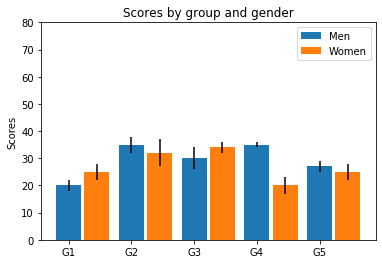

In [9]:
#We focus on plotting a bar chart
import numpy as np

l_col = len(df.values) # the x locations for the groups
ind = np.arange(l_col)
width = 0.4       # 1 means that all bars are connected. Less than 1 creates a space between bars. 

# Plotting functionality based on the available data in the DataFrame.
p1 = plt.bar(ind, df['menMeans'], width, yerr=df['menStd'])
p2 = plt.bar(ind+0.45, df['womenMeans'], width,
             yerr=df['womenStd'])

# Axes definition
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(list(range(0, 81, 10)))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

#Matplotlib's Anatomy

Let's dive in and explore how a PyPlot display is decomposed. You'll have to manipulate its components in order to get the expected result.


## PyPlot Display Objects

**MatPlotLib's key aspects:** 


**Figure:** Every display in Matplotlib is contained in a single box or object, refered to as **Figure**. It encapsulates everything. 

**Axes:** Within a Figure, you can have a single or several "Axes". each "Axes" object represents a two dimensional plot, with:
*   **Title:** Name of the Axes ; it usually summarizes what we expect to see in the plot.
*   **xAxis & yAxis:** Orthogonal axes that support the plotted data in 2D.
*   **xLabel & yLabel:** Name of xAxis and yAxis ; usually it help reading the plot and understanding the displayed data.
*   **xTicks & yTicks:** there are two types, minor and major ticks. They decompose xAxis and yAxis into smaller parts (easier to read)
*   **"lines":** This is the data to display







![MatplotLib's Anatomy](https://matplotlib.org/_images/sphx_glr_anatomy_001.png)

## Can you draw it yourself?

### Build the basic frame, axes and lines.

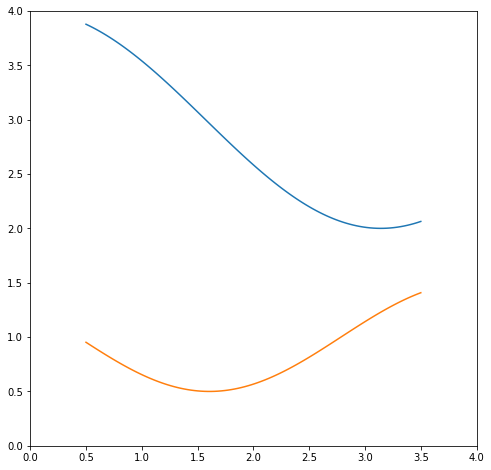

In [24]:
import numpy as np
import matplotlib.pyplot as plt


data = np.linspace(0.5, 3.5, 100)
#Transform Data as f1=3+cos(x) and f2=1+cos(1+3x/4)/2
Y1 = 3+np.cos(data)
Y2 = 1+np.cos(1+data/0.75)/2

#Create a figure object
fig = plt.figure(figsize=(8, 8))

#Add Axes via the subplot function.
ax = fig.subplots(1, 1)

#Define xaxis and yaxis limites 
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

#Plot lines!! Include Label information as well.
ax.plot(data, Y1)
ax.plot(data, Y2)

#Plot lines!! Include Label information as well.

plt.show()


### Add Title, Labels & Legend

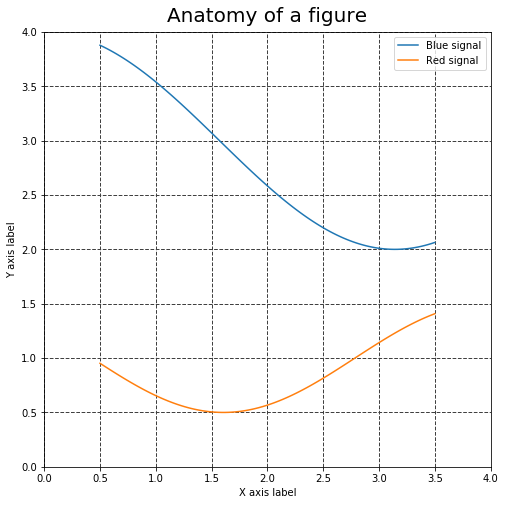

In [25]:
# title, axes labels, legend
ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")
ax.legend(('Blue signal', 'Red signal'))

# add a grid
ax.grid(linestyle="--", linewidth=1, color='.25')

fig

In [0]:
#For the rest of the exercice, we'll include random dots on the plot. Then you'll have to add Tickers and the rest of the missing information on the figure.
np.random.seed(19680801)
Y3 = np.random.uniform(Y1, Y2, len(data))

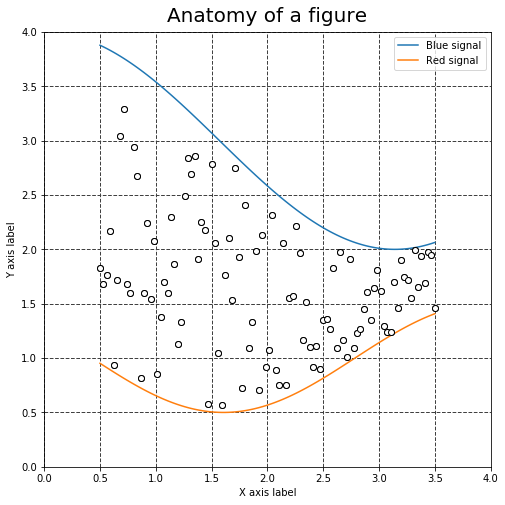

In [29]:
#Add Y3 to the graph, you can manipulate the color and shape of the dots using the parameters marker, markerfacecolor & markeredgecolor.
ax.plot(data, Y3, lw=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')
fig

# can also use ax.scatter

### Ticker functions

Tickers are set automatically based on the data range except ; but you also define them yourself when needed. In this subsection we'll explore how we can manipulate them via [matplotlib.ticker](https://matplotlib.org/3.1.1/api/ticker_api.html) library and its subfunctions AutoMinorLocator, MultipleLocator & FuncFormatter. "This module contains classes to support completely configurable tick locating and formatting."
*   **MultipleLocator:** Defines the scale of the major ticks, e.g., "ax.xaxis.set_major_locator(MultipleLocator(x))" where x could be 0.5 for instance, would give you a step size of 0.5 on the xaxis.
*   **AutoMinorLocator:** Defines the number of intervals between two major ticks, e.g., "ax.xaxis.set_minor_locator(AutoMinorLocator(2))" would divide the interval between two major ticks in 2 (so a single minor tick between them is added). 
*   **ScalarFormatter:** "Default formatter for scalars: autopick the format string.", e.g., just instanciated as follows "ax.xaxis.set_minor_formatter(ScalarFormatter())", and it will manage the rest. 



In [0]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, ScalarFormatter

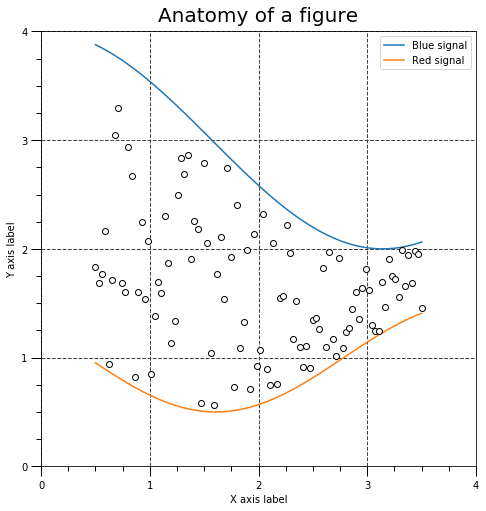

In [0]:
#Setup Major ticks on both xAxis and yAxis with a step size of 1 and divide intervals between major ticks in 4 sub intervals
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

#Bonus shape the ticker width & label
#Note: you can define a tick's width and length via the function tick_params, e.g., ax.tick_params(which='major', param=1.0) param: length, width, labelsize, labelcolor. which coulb be "minor" as well.
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)

ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

fig
fig

Now, last but not least, setting up minor tick's values. 

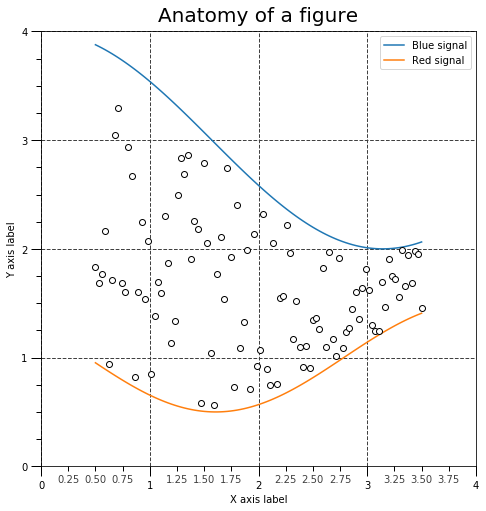

In [0]:
# setup minor ticks' values automatically. 
ax.xaxis.set_minor_formatter(ScalarFormatter())

fig

In [0]:
# Learn to declutter: remove top and right spines

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig

### Bonus: finalizing the figure with text labels and annotating circles

In [0]:
##For the purpose of the exercise, we define these two functions, Circle & Text that you can use.
#Circle: draws a cercle with a fixed radius. x & y represent it's position relatively to xAxis and yAxis.
def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)

#Text: displays a text field. x & y represent it's position relatively to xAxis and yAxis.
def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


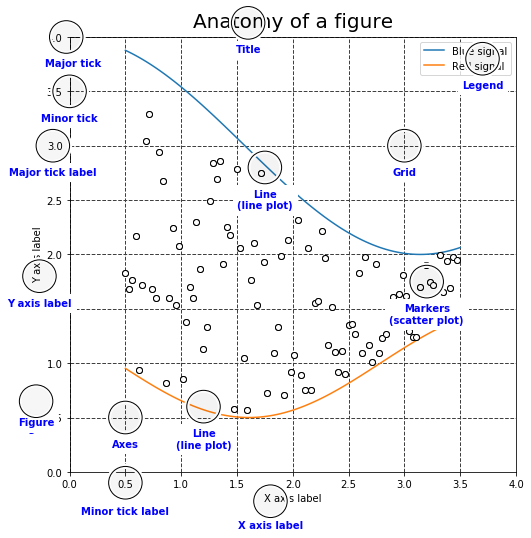

In [32]:
#@title Generate circles & Text Labels for Ticks
# Minor tick label
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.5, "Figure")

fig

## Matplotlib's charts & when to use them?

In this section, we'll guide you to explore MatPlotLib's available charts. For documentation, you can rely on [Matplotlib's website](https://matplotlib.org/gallery/index.html).


*   Histogram
*   Pie Chart
*   Box Plot

For the sake of the exercice, we'll rely on this dataset: Paris's real estate data. It's publicly available data that you find [here](https://www.data.gouv.fr/fr/datasets/5cc1b94a634f4165e96436c1/). We took the full dataset, cleaned it a bit and reduced it to sold appartements in Paris. 

The original file is available [here](https://drive.google.com/open?id=1BJdsMw8i8Ad0gT0LyrhAZYEL0JhN8c0m) (about 4MB). You can download it then load it on colab (under the folder "content"), or you can just use [this raw git url](https://raw.githubusercontent.com/annemariet/tutorials/master/data/RealEstate_Paris_cleaned_17_12_2019.csv) to load it directly with `pandas`.



### Load Data

In [0]:
#To make this section self sufficient, we'll re-import needed libraries. 
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#Load data and display columns and shape
path_data = "https://raw.githubusercontent.com/annemariet/tutorials/master/data/RealEstate_Paris_cleaned_17_12_2019.csv" 
df_housing = pd.read_csv(path_data, low_memory=False, index_col=0)
print('Data Columns: {}'.format(df_housing.columns))
print('Data shape: {}'.format(df_housing.shape))

Data Columns: Index(['index', 'id_mutation', 'date_mutation', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'lot1_surface_carrez',
       'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_surface_carrez',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'surface_terrain', 'longitude',
       'latitude', 'année', 'mois', 'duplicated'],
      dtype='object')
Data shape: (21121, 31)


In [73]:
# Check the number of zipcodes ("code_postal" or "code_commune") and the number of houses per district
nb_houses_per_district = df_housing['code_commune'].value_counts()
print(f"There are {len(nb_houses_per_district)} distinct zipcodes or districts.")
print("Number of house per district:")
nb_houses_per_district

There are 20 distinct zipcodes or districts.
Number of house per district:


75118    3100
75117    2102
75120    1727
75116    1588
75119    1397
75111    1354
75110    1305
75114    1251
75113    1174
75109     953
75112     845
75103     660
75107     649
75105     647
75106     622
75104     498
75102     488
75108     448
75101     297
75115      16
Name: code_commune, dtype: int64

### Histogram

Histograms aggregate data in ordered bins:
*   xAxis representing the ordered values of bins
*   yAxis: reprsenting the aggreagted data as a count of occurences (or frequency).


Histograms are used for quantitative variable (not categorical ones, otherwise we would use bar charts instead). 

It is very useful When looking a single quantitative variable to explore how values are distributed. It often gives a strong indication on it's variations and predictability. 

When a variable is projected on subdimensions e.g., variable: salary, projection on male/female. You can plot and compare both histogram, which gives an indication on how this variable (salary) evolves within the different categories of the population(male/female).

In the following exercise we will look at the distribution of housing prices, and compare it accross Paris area districts.

There are several functions available : use whichever you find more convenient.
- `plt.hist`
- `ax.hist`
- `pd.DataFrame.plot` with `kind="hist"`
- ...

In [39]:
df_housing.groupby("code_commune")["valeur_fonciere"].count()

code_commune
75101     297
75102     488
75103     660
75104     498
75105     647
75106     622
75107     649
75108     448
75109     953
75110    1305
75111    1354
75112     845
75113    1174
75114    1251
75115      16
75116    1588
75117    2102
75118    3100
75119    1397
75120    1727
Name: valeur_fonciere, dtype: int64

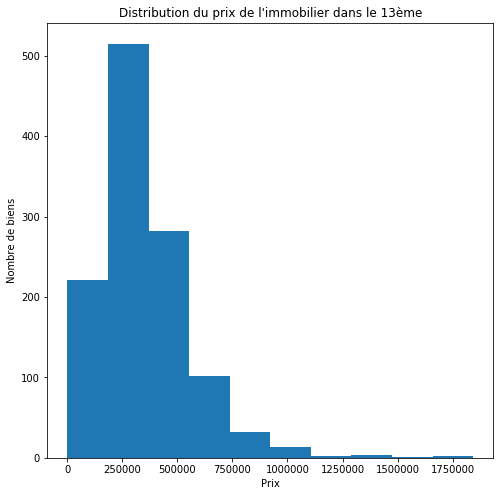

In [72]:
#Exercice1: Use hist() function to display a histogram in Pyplot.
#@todo: display a histogram representing prices in Paris's 13th arrondissement. 
#Don't forget to label the axes and to provide a title!
prices13 = df_housing.query("code_commune == 75113")["valeur_fonciere"]

# plt API
fig = plt.figure(figsize=(8,8))

plt.hist(prices13)
plt.title("Distribution du prix de l'immobilier dans le 13ème")
plt.xlabel("Prix")
plt.ylabel("Nombre de biens")
plt.xticks(rotation=75);

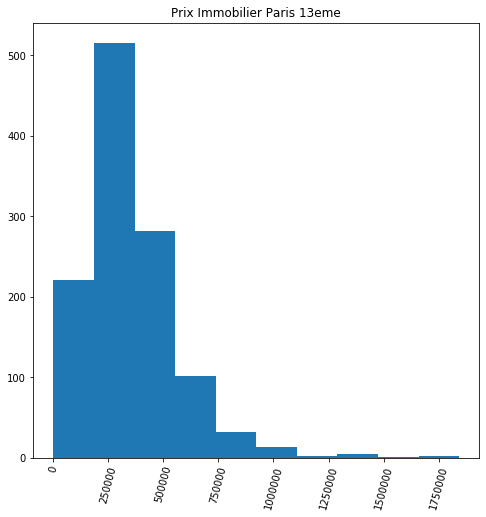

In [64]:
ax API
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot() # another way to get an axis :-)
ax.hist(df_housing[df_housing['code_commune']==75113]['valeur_fonciere']);

ax.set_title('Prix Immobilier Paris 13eme')
ax.tick_params(axis='x', labelrotation=75)


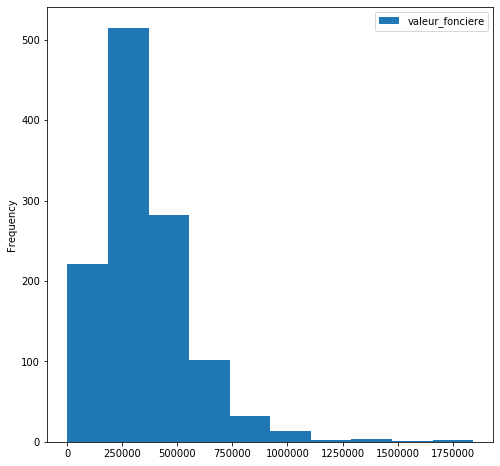

In [70]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
df_housing_13=df_housing[df_housing['code_commune']==75113]
df_housing_13.plot(y="valeur_fonciere", kind="hist", ax=ax);


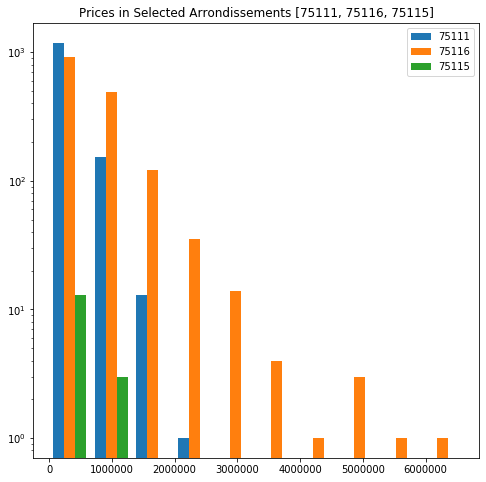

In [45]:
#Exercice2: display several histograms in the same figure
#@todo: compare 18th and 16th arrondissements. 
#Don't forget to label the axes and to provide a title and a legend!
#Bonus: put a logarithmic scale on the y-axis
fig = plt.figure(figsize=(8,8))
ax = fig.subplots(1,1)
selected_arr=[75111, 75116, 75115]
#data = [df_housing[df_housing['code_commune']==x]['valeur_fonciere'] for x in selected_arr]
data = [df_housing.query(f"code_commune == {code}").valeur_fonciere for code in selected_arr]

ax.hist(data)
ax.legend(selected_arr)
ax.set_yscale("log")
ax.set_title(f"Prices in Selected Arrondissements {selected_arr}");


### PieChart

**Pie chart** is a simple circular representation of either quantitative (aggregated) or categorical variables. the full pie represents 100% of the visualized data and each slice represent a percentage of the occurences. 

Very useful to highlight certain slices and offers a constrasts between the dominant categories and the others.

In [0]:
data = df_housing['code_commune'].value_counts()


In [47]:
data.index

Int64Index([75118, 75117, 75120, 75116, 75119, 75111, 75110, 75114, 75113,
            75109, 75112, 75103, 75107, 75105, 75106, 75104, 75102, 75108,
            75101, 75115],
           dtype='int64')

In [48]:
data.index[0]

75118

In [49]:
data.values[0]

3100

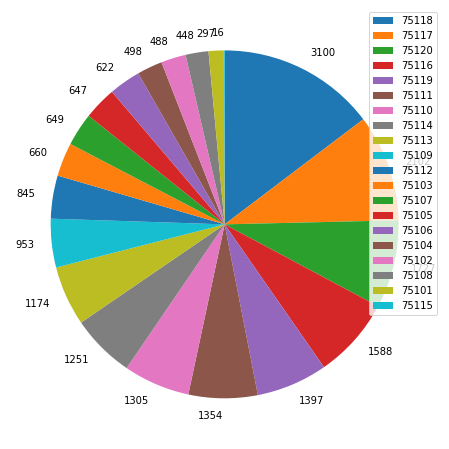

In [50]:
#Exercice3: Use pie() function to display a Pie chart in Pyplot.
#@todo: Display a piechart representing all #sales in Paris, where each category is the arrondissement ("code_commune").  
#Don't forget to label the axes and to provide a title and a legend!
#Bonus: how can you reduce the ugliness of this?

fig = plt.figure(figsize=(8,8))
ax = fig.subplots(1,1)

data = df_housing['code_commune'  ].value_counts()
labels=[data[x] for x in data.index]
legend = [x for x in data.index]

ax.pie(data, labels=labels, startangle=90, counterclock=False)
ax.legend((legend))

###BoxPlot

"The box-and-whisker plot is an exploratory graphic, created by John W. Tukey, used to show the distribution of a dataset (at a glance). Think of the type of data you might use a histogram with, and the box-and-whisker (or box plot, for short) could probably be useful." [source](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/)

There are several functions available : use whichever you find more convenient.
- `plt.boxplot`
- `ax.boxplot`
- `pd.DataFrame.boxplot`
- ...

![boxplot](https://i2.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif?w=1090)

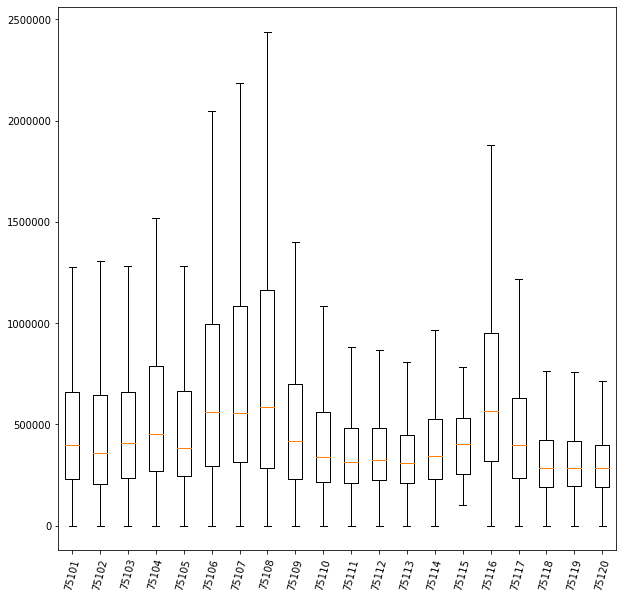

In [54]:
#Exercice4: Use boxplot() function to display boxplots in Pyplot.
#@todo: Represents all prices per district in a single figure with boxplot().  
#Don't forget to label the axes and to provide a title and a legend!
import numpy as np
prices = df_housing.groupby("code_commune")["valeur_fonciere"].apply(np.array)

fig = plt.figure(figsize=(10,10))
ax = fig.subplots(1,1)

#number_of_arr = 10
#selected_arr = df_housing['code_commune'].unique()[0:number_of_arr]
selected_arr =[75101, 75102, 75103, 75104, 75105]
#data = [df_housing[df_housing['code_commune']==x]['valeur_fonciere'] for x in df_housing['code_commune'].unique()[0:number_of_arr]]
#data = [df_housing[df_housing['code_commune']==x]['valeur_fonciere'] for x in selected_arr]
ax.boxplot(prices, positions=prices.index, showfliers=False)
ax.tick_params(axis='x', labelrotation=75);

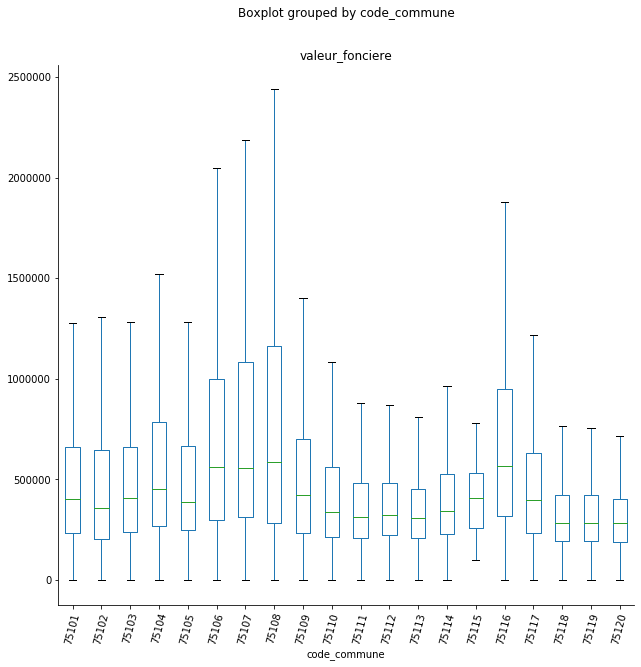

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(1,1)
df_housing.boxplot(column="valeur_fonciere", by="code_commune", ax=ax, showfliers=False, grid=False)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', labelrotation=75);

#Leverage MatplotLib On Real Data - Answering Open Questions

## Load Data 

Let's explore Paris's real estate data. It's publicly available data that you find [here](https://www.data.gouv.fr/fr/datasets/5cc1b94a634f4165e96436c1/). We took the full dataset, cleaned it a bit and reduced it to sold appartements in paris. 

The file is available [here](https://drive.google.com/open?id=1BJdsMw8i8Ad0gT0LyrhAZYEL0JhN8c0m) (about 4MB). **It is the same file as in the previous exercise.** You can download it then load it on colab (under the folder "content"), or you can just use [this raw git url](https://raw.githubusercontent.com/annemariet/tutorials/master/data/RealEstate_Paris_cleaned_17_12_2019.csv) to load it directly with `pandas`.


In [0]:
#To make this section self sufficient, we'll re-import needed libraries. 
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Load data and display columns and shape


## Basic insights

Exploring data means answering questions, so let's ask a few question that you'll have to answer via visualization. 

PS: if you need a few minutes to look at the data, understand columns, explore missing points, etc. Go ahead :)

Here are a few "open" questions for you to further explore the data. 

**Question1:** What can you tell us about the number of sold items per month and per arrondissement? 

In [0]:
#@todo

**Question2:** What about prices? which regions are the most/least expensive in Paris (in average)?

In [0]:
#@todo

**Question3:** What can we say about the relationship between price & surface? 

In [0]:
#@todo

**Question4:** Let's assume we build a prediction model to predict the price, how precise can it be? 

In [0]:
#@todo

## Complex view: master Matplotlib's multiple Axes in a Figure

### HowTo & Example

Putting data into perspective can be simpler with a single Figure divided into several subplots. Matplotlib enables you to do just that. 

**How?** simply by relying on the pyplot function subplot2grid(). See example below.  

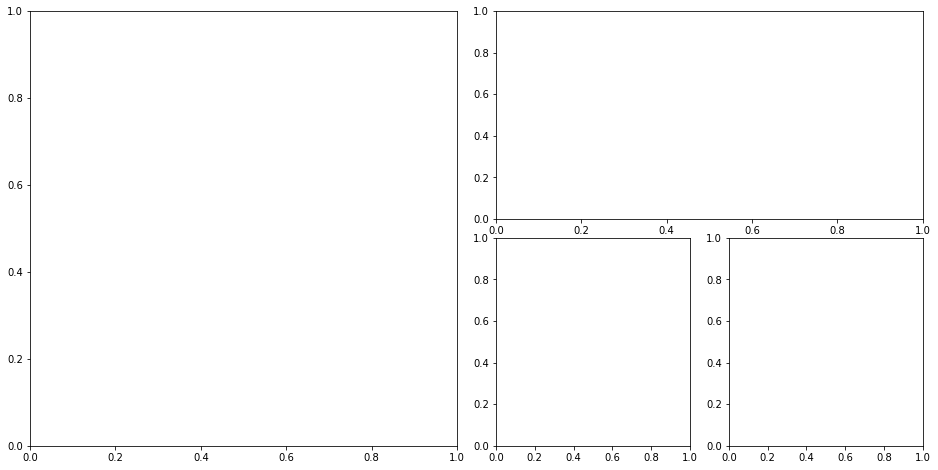

In [0]:
#Example: how to setup multiple axes. 
ex_fig = plt.figure(figsize=(16, 8))
gridsize = (4, 4)
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=4)
ax2 = plt.subplot2grid(gridsize, (0, 2), colspan=2, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (2, 2), colspan=1, rowspan=2)
ax4 = plt.subplot2grid(gridsize, (2, 3), colspan=1, rowspan=2)
plt.show()

### Practices multiple Axes

In [0]:
#@todo: Answer Exercices 2, 3 & 4 in a single figure.

#Built in Visualization with Seaborn

For this part of the workshop, we'll explore the same dataset, but rely on another library built on top of Matplotlib called `seaborn`.

In [0]:
#@todo: import Seaborn library

In [0]:
#@todo: answer question 1 to 4 relying on Seaborn

In [0]:
#@todo: Explore correlations between prices and other features of the dataset.

In [0]:
#@todo: Find and use Seaborn's function that enables you to plot prices, based on the surface, while computing and displaying its linear regression.

In [0]:
#Bonus: build a basic xgboost model to predict prices and visualize:
#1. The curve describing the real prices vs predicted prices
#2. show the centered distribution of prices
#3. what proportion of predicted prices is within 20% of the real price.  

#Interactive Visualization with Bokeh 

##Introduction to Bokeh

We'll continue exploring our dataset, but with an interactive library this time: Bokeh. Its official documentation/training can be found [here](https://hub.gke.mybinder.org/user/bokeh-bokeh-notebooks-qikuq6ov/notebooks/tutorial/00%20-%20Introduction%20and%20Setup.ipynb).

We'll focus on a few elements to get you acquainted and operational ; you can explore the rest on your own as needed.


**Why Bokeh?** Unlike Matplotlib or Seaborn, Bokeh renders its display in HTML and JavaScript. Its purpose is to offer an interactive visualisation tool that can be easily embedded in web applications. 



**Basic plotting template?** assuming you already prepared your data, rendering it on Bokeh requires a few steps:
1.   Importing Bokeh librairies
2.   Choosing rendering type (e.g., html or inline in a notebook)
3.   Prepare a plotting canvas (aka Figure)
4.   Define plotting schema and layout
5.   Invoke show() that will finally display the data based on the previous setps. 



In [0]:
# Import Data manipulation Libraries
import pandas as pd


#1 Import Bokeh Libraries
from bokeh.plotting import output_file, output_notebook, show, figure

In [0]:
#2 Rendering File & Enabling Rendering on Jupyter Notebooks
output_file('myDataViz.html')  # Static HTML or use the second line to enable 
output_notebook()  # Rendering in a Jupyter Notebook

#3 Prepare the canvas in which the data will be displayed: figure
fig = figure()  

#4 Define plotting schema and layout (will be explored in the next subsections)

#5 Preview and save 
show(fig)  # See what I made, and save if I like it

## You should observe an empty display since we didn't plug the data (#4)

## First plot based on real data

In [0]:

#Price/Surface relationship (relying on the same real estate data used before)

In [0]:
#Reminder: we'll be working with the loaded data in a dataframe
df_housing.columns

Index(['Unnamed: 0', 'index', 'id_mutation', 'date_mutation',
       'nature_mutation', 'valeur_fonciere', 'adresse_numero',
       'adresse_suffixe', 'adresse_nom_voie', 'adresse_code_voie',
       'code_postal', 'code_commune', 'nom_commune', 'code_departement',
       'lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez',
       'lot4_surface_carrez', 'lot5_surface_carrez', 'nombre_lots',
       'code_type_local', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'code_nature_culture', 'nature_culture',
       'surface_terrain', 'longitude', 'latitude', 'année', 'mois',
       'duplicated'],
      dtype='object')

In [0]:
#Focus on a single arrondissement first (e.g., 75)

In [0]:
df_housing_arr=df_housing[df_housing['code_commune']==75113]

In [0]:
df_housing_arr.shape

(1174, 32)

In [0]:
# Import Data manipulation Libraries
import pandas as pd

#1 Import Bokeh Libraries
from bokeh.plotting import output_file, output_notebook, show, figure

#2 Rendering File & Enabling Rendering on Jupyter Notebooks
output_file('Real_Estate_Price_Surface_Relationship.html')  # Static HTML or use the second line to enable 
output_notebook()  # Rendering in a Jupyter Notebook

#3 Prepare the canvas in which the data will be displayed: figure
fig = figure(title="Price_Surface_Relationship", x_axis_label='Surface', y_axis_label='Price')  

#4 Define plotting schema and layout (will be explored in the next subsections)
fig.circle(x=, y=, line_width=2)


#5 Preview and save 
show(fig)  # See what I made, and save if I like it

## Using ColumnDataSource

We'll update step 4 to rely on Bokeh's ColumDataSource, key elements that we'll rely on to add interactions in the next subsections. For now we'll plot the same data. 

In [0]:
# Import Data manipulation Libraries
import pandas as pd

#1 Import Bokeh Libraries
from bokeh.plotting import output_file, output_notebook, show, figure
from bokeh.models import ColumnDataSource

#2 Rendering File & Enabling Rendering on Jupyter Notebooks
output_file('Real_Estate_Price_Surface_Relationship.html')  # Static HTML or use the second line to enable 
output_notebook()  # Rendering in a Jupyter Notebook

#3 Prepare the canvas in which the data will be displayed: figure
fig = figure(title="Price_Surface_Relationship", x_axis_label='Surface', y_axis_label='Price')

#4 Define plotting schema and layout (will be explored in the next subsections)
src = ColumnDataSource(todo)
fig.circle(source=src,x=todo,y=todo, line_width=2)


#5 Preview and save 
show(fig)  # See what I made, and save if I like it

**You can discover more about Bokeh plotting functions** [here](https://docs.bokeh.org/en/latest/docs/user_guide/plotting.html) 

## Interactive Figure with Widgets

**Widgets**: as described in the [official documentation](https://docs.bokeh.org/en/latest/docs/user_guide/interaction/widgets.html) "Widgets are interactive controls that can be added to Bokeh applications to provide a front end user interface to a visualization. They can drive new computations, update plots, and connect to other programmatic functionality. When used with the Bokeh server, widgets can run arbitrary Python code, enabling complex applications. Widgets can also be used without the Bokeh server in standalone HTML documents through the browser’s Javascript runtime.

To use widgets, you must add them to your document and define their functionality. Widgets can be added directly to the document root or nested inside a layout. There are two ways to program a widget’s functionality:

Use the `CustomJS` callback (see JavaScript Callbacks). This will work in standalone HTML documents.

Use `bokeh serve` to start the Bokeh server and set up event handlers with `.on_change` (or for some widgets, `.on_click`)."


**More about Widgets**: [here](https://docs.bokeh.org/en/latest/docs/user_guide/interaction/widgets.html)